# lab:13 Linear Regressions

## We will do a Linear Regressions on the Kaggle data set have a name "50_Startups"

### Osama-Yousef

### Date : 1/9/2020

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [103]:
startup = pd.read_csv("50_Startups.csv")
startup.head(5)


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [104]:
print(f'Columns: {startup.columns}')


Columns: Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')


In [105]:
startup.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [106]:
startup.describe()


,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


## lets take at first the relationship between marketing spend VS profit

In [135]:
X = startup['Marketing Spend'].values


In [136]:
y = startup['Profit'].values


In [137]:
X = X.reshape(-1,1)


In [138]:
X


array([[471784.1 ],
       [443898.53],
       [407934.54],
       [383199.62],
       [366168.42],
       [362861.36],
       [127716.82],
       [323876.68],
       [311613.29],
       [304981.62],
       [229160.95],
       [249744.55],
       [249839.44],
       [252664.93],
       [256512.92],
       [261776.23],
       [264346.06],
       [282574.31],
       [294919.57],
       [     0.  ],
       [298664.47],
       [299737.29],
       [303319.26],
       [304768.73],
       [140574.81],
       [137962.62],
       [134050.07],
       [353183.81],
       [118148.2 ],
       [107138.38],
       [ 91131.24],
       [ 88218.23],
       [ 46085.25],
       [214634.81],
       [210797.67],
       [205517.64],
       [201126.82],
       [197029.42],
       [185265.1 ],
       [174999.3 ],
       [172795.67],
       [164470.71],
       [148001.11],
       [ 35534.17],
       [ 28334.72],
       [  1903.93],
       [297114.46],
       [     0.  ],
       [     0.  ],
       [ 45173.06]])

In [111]:
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.8, test_size=0.2,)


In [112]:
x_train.shape # 80% of X data


(40, 1)

In [113]:
x_test.shape # 20% of X data


(10, 1)

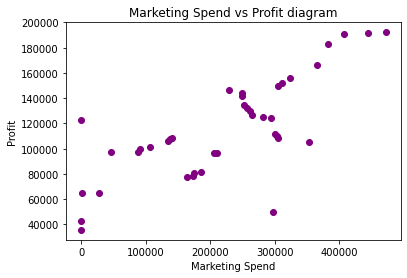

In [114]:
%matplotlib inline
plt.scatter(x_train, y_train, color="purple")
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.title('Marketing Spend vs Profit diagram')
plt.show()

### Let's create the model and train it


In [115]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

### Now testing:


In [117]:
y_predict = model.predict(x_test)


In [118]:
y_test # The leftover testing data for y


array([156122.51,  90708.19,  89949.14, 103282.38,  69758.98,  14681.4 ,
       156991.12,  96778.92, 118474.03,  71498.49])

In [119]:
y_predict # The resulted predicted data of y


array([ 93771.10540658, 111291.25697854, 110313.36474246,  91487.4427893 ,
        71770.64225026,  74071.07562154, 149891.08881646, 114515.09613169,
       134569.75325934,  98612.18748435])

###  given a new value for the marketing spend, what is the predicted profit ?


In [120]:
new_mark_spend = np.array([300000]).reshape(-1,1)
new_mark_spend

array([[300000]])

In [121]:
model.predict(new_mark_spend) # Predicted the profit if the marketing spend is 300,000 


array([134888.49304995])

### Accuracy of model


In [124]:
model.score(x_train, y_train)*100 ## this is the train accuracy



58.07829855529904

In [125]:
model.score(x_test, y_test)*100 ## this is the test accuracy


38.461542266790694

### Now Plotting the predicted output vs. the test output


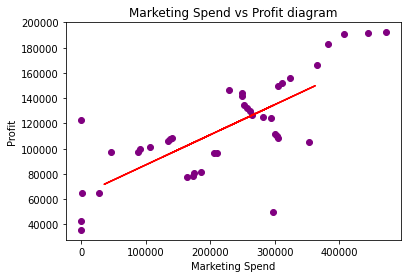

In [126]:
%matplotlib inline
plt.scatter(x_train, y_train, color="purple")
plt.plot(x_test, y_predict, color='red')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.title('Marketing Spend vs Profit diagram')
plt.show()

In [127]:
predicted = model.predict(x_test)
df = pd.DataFrame({'Actual':y_test,'Predicted':predicted})
df

,Actual,Predicted
0,156122.51,93771.105407
1,90708.19,111291.256979
2,89949.14,110313.364742
3,103282.38,91487.442789
4,69758.98,71770.642250
5,14681.40,74071.075622
6,156991.12,149891.088816
7,96778.92,114515.096132
8,118474.03,134569.753259
9,71498.49,98612.187484


## Conclusions:

  * We noticed that in the startup companies , when they spend more and more on the marketing for their company , they will gain more profits 
  * the increment is linearly as we see in the diagram 
  * Test accuracy is about 38 % while train accuracy is about 58 %





## other solution
### now we will compare R&d (means research and development spending ) VS Profit


In [128]:
startup = pd.read_csv("50_Startups.csv")


In [139]:
X = startup['R&D Spend'].values


In [140]:
y = startup['Profit'].values


In [141]:
X = X.reshape(-1,1)


In [142]:
X

array([[165349.2 ],
       [162597.7 ],
       [153441.51],
       [144372.41],
       [142107.34],
       [131876.9 ],
       [134615.46],
       [130298.13],
       [120542.52],
       [123334.88],
       [101913.08],
       [100671.96],
       [ 93863.75],
       [ 91992.39],
       [119943.24],
       [114523.61],
       [ 78013.11],
       [ 94657.16],
       [ 91749.16],
       [ 86419.7 ],
       [ 76253.86],
       [ 78389.47],
       [ 73994.56],
       [ 67532.53],
       [ 77044.01],
       [ 64664.71],
       [ 75328.87],
       [ 72107.6 ],
       [ 66051.52],
       [ 65605.48],
       [ 61994.48],
       [ 61136.38],
       [ 63408.86],
       [ 55493.95],
       [ 46426.07],
       [ 46014.02],
       [ 28663.76],
       [ 44069.95],
       [ 20229.59],
       [ 38558.51],
       [ 28754.33],
       [ 27892.92],
       [ 23640.93],
       [ 15505.73],
       [ 22177.74],
       [  1000.23],
       [  1315.46],
       [     0.  ],
       [   542.05],
       [     0.  ]])

In [143]:
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.8, test_size=0.2, random_state=50)


In [144]:
x_train.shape # 80% of X data


(40, 1)

In [145]:
x_test.shape # 20% of X data


(10, 1)

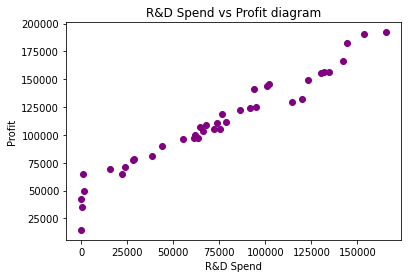

In [146]:
%matplotlib inline
plt.scatter(x_train, y_train, color="purple")
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.title('R&D Spend vs Profit diagram')
plt.show()

In [147]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

### Now testing time

In [148]:
y_predict = model.predict(x_test)
y_test # The leftover testing data for y


array([ 96712.8 ,  90708.19, 191792.06,  81229.06, 152211.77, 126992.93,
        96479.51, 134307.35, 101004.64, 108552.04])

In [149]:
y_predict # The resulted predicted data of y


array([ 86727.15165434,  71248.00509217, 187966.10577323,  63897.96145707,
       151316.68940125, 114254.00044962,  86368.06647111, 126436.38685958,
       103441.24449282, 113409.46835141])

### accuracy of the model

In [150]:
model.score(x_train, y_train)*100 ## this is the train accuracy
 

95.27850311266712

In [151]:
model.score(x_test, y_test)*100 ## this is the test accuracy


88.89085589365531

#### Plotting the predicted output vs. the test output


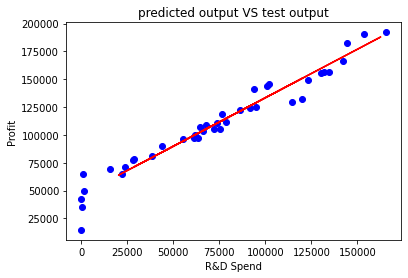

In [152]:
plt.scatter(x_train, y_train, color='blue')
plt.plot(x_test, y_predict, color='red')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.title('predicted output VS test output')
plt.show()

In [153]:

predicted = model.predict(x_test)
df = pd.DataFrame({'Actual':y_test,'Predicted':predicted})
df

,Actual,Predicted
0,96712.80,86727.151654
1,90708.19,71248.005092
2,191792.06,187966.105773
3,81229.06,63897.961457
4,152211.77,151316.689401
5,126992.93,114254.000450
6,96479.51,86368.066471
7,134307.35,126436.386860
8,101004.64,103441.244493
9,108552.04,113409.468351


## Conclusions:

  * We noticed that in the startup companies , when they spend more and more on doing researches and development for their company , they will gain more profits for sure 
  * the increment is linearly as we see in the diagram 
  * Test accuracy is about 88.9 % while train accuracy is about 95 %



## Other solution


### now we will compare R&d Spend and Marketing Spend 

In [155]:
startup = pd.read_csv("50_Startups.csv")



In [156]:
X = startup['R&D Spend'].values


In [157]:
y = startup['Marketing Spend'].values


In [158]:
X = X.reshape(-1,1)


In [159]:
X

array([[165349.2 ],
       [162597.7 ],
       [153441.51],
       [144372.41],
       [142107.34],
       [131876.9 ],
       [134615.46],
       [130298.13],
       [120542.52],
       [123334.88],
       [101913.08],
       [100671.96],
       [ 93863.75],
       [ 91992.39],
       [119943.24],
       [114523.61],
       [ 78013.11],
       [ 94657.16],
       [ 91749.16],
       [ 86419.7 ],
       [ 76253.86],
       [ 78389.47],
       [ 73994.56],
       [ 67532.53],
       [ 77044.01],
       [ 64664.71],
       [ 75328.87],
       [ 72107.6 ],
       [ 66051.52],
       [ 65605.48],
       [ 61994.48],
       [ 61136.38],
       [ 63408.86],
       [ 55493.95],
       [ 46426.07],
       [ 46014.02],
       [ 28663.76],
       [ 44069.95],
       [ 20229.59],
       [ 38558.51],
       [ 28754.33],
       [ 27892.92],
       [ 23640.93],
       [ 15505.73],
       [ 22177.74],
       [  1000.23],
       [  1315.46],
       [     0.  ],
       [   542.05],
       [     0.  ]])

In [160]:
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.7, test_size=0.3, random_state=40)




In [161]:
x_train.shape # 70% of X data

(35, 1)

In [162]:

x_test.shape # 30% of X data

(15, 1)

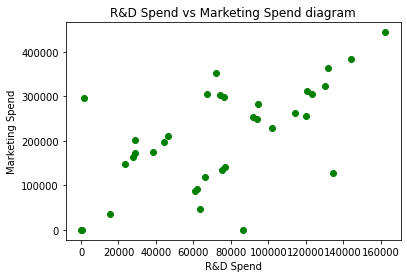

In [163]:
%matplotlib inline
plt.scatter(x_train, y_train, color="green")
plt.xlabel('R&D Spend')
plt.ylabel('Marketing Spend')
plt.title('R&D Spend vs Marketing Spend diagram')
plt.show()

In [164]:

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

### noe the testing time

In [165]:
y_predict = model.predict(x_test)
y_test # The leftover testing data for y

array([214634.81, 107138.38,  45173.06, 185265.1 ,   1903.93, 471784.1 ,
       294919.57, 366168.42, 249744.55, 407934.54, 264346.06, 205517.64,
       137962.62, 299737.29,  28334.72])

In [166]:

y_predict # The resulted predicted data of y


array([177122.34014146, 193564.62539601,  86884.03240745, 119779.22130197,
        88510.4991222 , 355757.16169764, 236076.67294606, 317963.74250526,
       250585.97300938, 336394.15375495, 213740.58212985, 161707.09504471,
       192034.84615401, 214352.57838348, 122947.09382162])

## Accuracey of the model

In [167]:
 
model.score(x_train, y_train)*100 ## this is the train accuracy
 




37.42067564354111

In [168]:
model.score(x_test, y_test)*100 ## this is the test accuracy


73.98212602232043

#### Plotting the predicted output vs. the test output


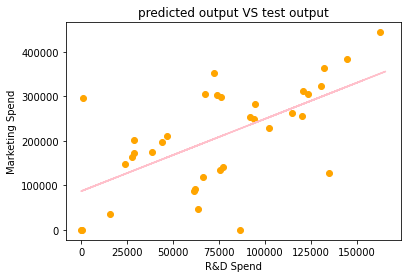

In [169]:
plt.scatter(x_train, y_train, color='orange')
plt.plot(x_test, y_predict, color='pink')
plt.xlabel('R&D Spend')
plt.ylabel('Marketing Spend')
plt.title('predicted output VS test output')
plt.show()

In [170]:

predicted = model.predict(x_test)
df = pd.DataFrame({'Actual':y_test,'Predicted':predicted})
df

,Actual,Predicted
0,214634.81,177122.340141
1,107138.38,193564.625396
2,45173.06,86884.032407
3,185265.10,119779.221302
4,1903.93,88510.499122
5,471784.10,355757.161698
6,294919.57,236076.672946
7,366168.42,317963.742505
8,249744.55,250585.973009
9,407934.54,336394.153755


## Conclusions:

  * The company spending money on the marketing side and R&D side so in the dataset we see that both of them are increasing , but in actual there is no relationship between both of them , but we did this comparison just to make a 3 conclusions because the lab wanted that although my dataset i cant do third comparison between the data  i have 
  * the increment is linearly as we see in the diagram 
  * Test accuracy is about 74 % while train accuracy is about 37 %
